# <span style='font-family:Inter Black'> Theory


Return of a Portfolio in a certain time $t$ is simply defined as the weighted sum of each of its $n$ components return, i.e.

$$
\begin{equation}
\text{R}_p^{(t)} = \sum_{i}^{n} \text{w}_i^{(t)} \text{r}_i^{(t)}\tag{1}
\end{equation}
$$

In a two assets world:

$$
\text{R}_p^{(t)} = \text{w}_1^{(t)} \text{r}_1^{(t)} + \text{w}_2^{(t)} \text{r}_2^{(t)}
$$

Over time, portfolio return will be a vector of returns where each day's return is computed as in $(1)$:

$$
\text{R}_p = \text{w}_1 \text{r}_1 + \text{w}_2 \text{r}_2
$$


Its variance and standard deviation are respectivelyis (dropping the time notation):

$$
\sigma_p^2= \text{w}_1^{2} \sigma_1^{2} + \text{w}_2^{2} \sigma_2^{2} + 2\text{w}_1\text{w}_2\sigma_{12}\\
\sigma_p^2= \text{w}_1^{2} \sigma_1^{2} + \text{w}_2^{2} \sigma_2^{2} + 2\text{w}_1\text{w}_2\sigma_{1}\sigma_{2}\rho_{12}
$$

Then

$$
\sigma_p= \sqrt{\text{w}_1^{2} \sigma_1^{2} + \text{w}_2^{2} \sigma_2^{2} + 2\text{w}_1\text{w}_2\sigma_{12}}\\
\sigma_p= \sqrt{\text{w}_1^{2} \sigma_1^{2} + \text{w}_2^{2} \sigma_2^{2} + 2\text{w}_1\text{w}_2\sigma_{1}\sigma_{2}\rho_{12}}
$$

The time average gorwth rate of a portfolio is:
$$\mu - \frac{\sigma^2}{2} $$    

    
For our portfolio, the time average growth rate:    
$$g_m = \text{R}_p - \frac{\sigma^2_p}{2} $$    
    
$$
g_m^{'} = r_1 - r_2 - \sigma_1^2w_1 + \sigma_2^2 -w_1\sigma_2^2 -\rho \sigma_1 \sigma_2 + 2 \rho \sigma_1 \sigma_2 w_1 = 0 \iff\\
w_1 (-\sigma_1^2 -\sigma_2^2 + 2 \rho \sigma_1 \sigma_2) = -r_1 + r_2 - \sigma_2^2 + \rho \sigma_1 \sigma_2\\
w_1 = \frac{-r_1 + r_2 - \sigma_2^2 +\rho \sigma_1 \sigma_2}{(-\sigma_1^2 -\sigma_2^2 + 2 \rho \sigma_1 \sigma_2)}
$$  

In [1]:
import sys
import itertools
import numpy as np
import pandas as pd

sys.path.insert(0, r'C:\Users\lucab\PycharmProjects\Warehouse')

In [2]:
from primitive import rebase_at_x
from Viz.charting import generate_ax
from Finance.primitive import BrownianMotion

In [3]:
# FIXED PARAMS
high_mean = 0.005
low_mean = 0.003
sigma_1 = 0.05
sigma_2 = 0.04

# VARIABLE PARAMS
rho_l = np.arange(-1, 1, 0.01) 
w_1 = np.arange(0, 1, 0.01)

In [66]:
params = pd.DataFrame(list(itertools.product(w_1, rho_l)), columns=['w_1', 'rho'])
w1 = params.loc[:, 'w_1']
w2 = 1 - params.loc[:, 'w_1']
rho = params.loc[:, 'rho']

In [67]:
ptf_vol = (sigma_1**2 * w1**2) + (sigma_2**2 * w2**2) + 2 * w1 * w2 * sigma_1 * sigma_2 * rho
ptf_ret = (w1 * high_mean) + (w2 * low_mean)  - ptf_vol / 2

In [68]:
params['return'] = ptf_ret
params_pivot = round(params, 5).pivot('w_1', 'rho', 'return')

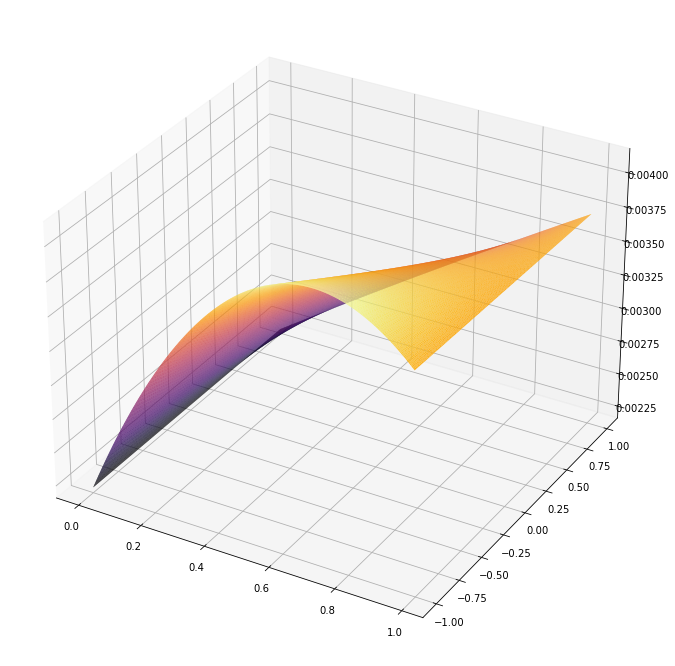

In [69]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(params.loc[:, 'w_1'], params.loc[:, 'rho'], params.loc[:, 'return'], norm=None, vmin=None, vmax=None, lightsource=None, cmap='inferno')
plt.show()

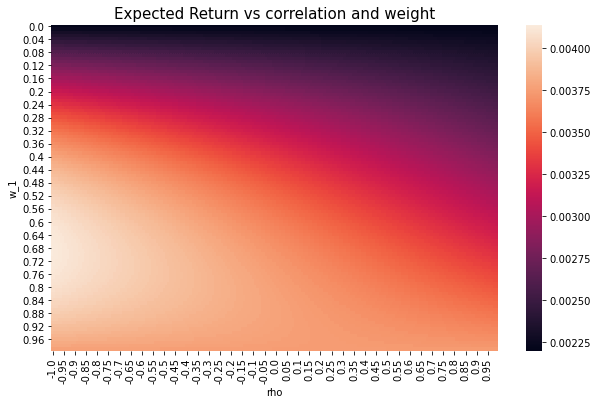

In [72]:
import seaborn as sns
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
params_pivot = round(params, 5).pivot('w_1', 'rho', 'return')
sns.heatmap(params_pivot, ax=ax)
ax.set_title('Expected Return vs correlation and weight', size=15)
plt.show()

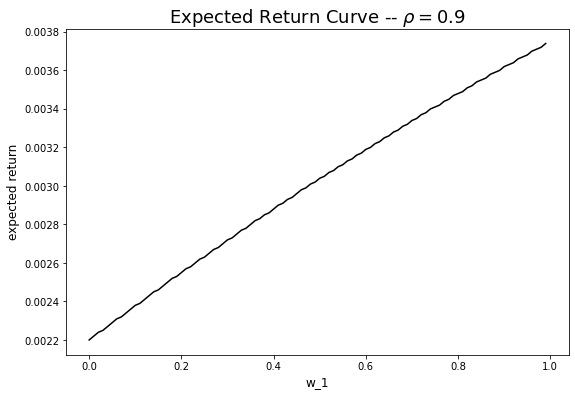

In [9]:
show_rho = 0.9
ax = generate_ax(r'Expected Return Curve -- $\rho=%s$' %str(show_rho), 'time', 'expected return')
params_pivot.loc[:, show_rho].plot(cmap='inferno', ax=ax)
plt.show()

In [10]:
chosen_rho = -1
def time_average_optimal_w(mu_1, mu_2, sigma_1, sigma_2, rho):
    opt_w = (-mu_1 + mu_2 - sigma_2**2 + rho * sigma_1 * sigma_2)/(-sigma_1**2 -sigma_2**2 + 2 * rho *sigma_1 * sigma_2)
    return opt_w    
        

def time_average(w1, mu_1, mu_2, sigma_1, sigma_2, rho):    
    w2 = 1 - w1
    return w1 * mu_1 + w2 * mu_2 - 1/2 * (w1**2 * sigma_1**2 + w2**2 * sigma_2**2 + 2 * rho * sigma_1 * sigma_2 * w1 * w2)
    

optimal_weight = time_average_optimal_w(high_mean, low_mean, sigma_1, sigma_2, chosen_rho)
ptf_time_average = time_average(optimal_weight, high_mean, low_mean, sigma_1, sigma_2, chosen_rho)

print('Optimal Weight: ' + str(round(optimal_weight * 100, 3)) + r'%')
print('Assets Time Average: 1st > ' + str(round((high_mean - sigma_1**2/2) * 100, 3)) + r'%')
print('Assets Time Average: 2st > ' + str(round((low_mean - sigma_2**2/2) * 100, 3)) + r'%')
print('Optimal Ptf Time Average: ' + str(round(ptf_time_average * 100, 3)) + r'%')

Optimal Weight: 69.136%
Assets Time Average: 1st > 0.375%
Assets Time Average: 2st > 0.22%
Optimal Ptf Time Average: 0.414%


# <span style='font-family:Inter Black'> Practice </span>


## <span style='font-family:Inter'> Time-Series Strategy</span>
[...]

## <span style='font-family:Inter'> Cross-Sectional Strategy</span>
    
> One interesting feature of cross-sectional strategies is that, in contrast to “time series” strategies, we should not expect profits from every individual stock, as some of them may serve as “hedges” on some days. Rather, profits can be obtained only in the aggregate across all the stocks.  [*E. Chan (2013)*]   

### <span style='font-family:Inter'> Information Coefficient (IC)</span>

A useful evaluation metric is the rank **information coefficient (IC)**, often referred to as rank IC. The rank IC tells us whether the ranks of our alpha values are correlated with the ranks of the future returns (using the **spearman rho**, or **rank correlation**). In other words, if the alpha factor suggested that we bet more on an asset class 1 and less on asset class 2, was the future return of asset class 1 relatively high? If the future performance of the assets matched the expectations that was suggested by the alpha factor, then the information coefficient would be higher. 

<div class="alert alert-info">
If the signals are very correlated (e.g. $\rho > 0.5$) and if we rescale the weights to sum to 1, the approach based on the information coefficient does not make sense.
</div>



In [2]:
T = 10000

In [3]:
gbm_high = BrownianMotion(S0=100, mu=high_mean, sigma=sigma_1, T=T, I=1)
gbm_low = BrownianMotion(S0=100, mu=low_mean, sigma=sigma_2, T=T, I=1)

NameError: name 'BrownianMotion' is not defined

In [1]:
gbm = pd.concat([gbm_high, gbm_low], axis=1)
gbm.columns = ['high', 'low']
gbm_ret = gbm.pct_change()

w = 0.5

bmk_ret = gbm_ret.loc[:, 'high'] * w + gbm_ret.loc[:, 'low'] * (1-w)  
bmk = rebase_at_x((bmk_ret.fillna(0) + 1).cumprod())
gbm['benchmark'] = bmk

NameError: name 'pd' is not defined

<AxesSubplot:title={'center':'GBM - High and Low Mean'}, xlabel='time', ylabel='y'>

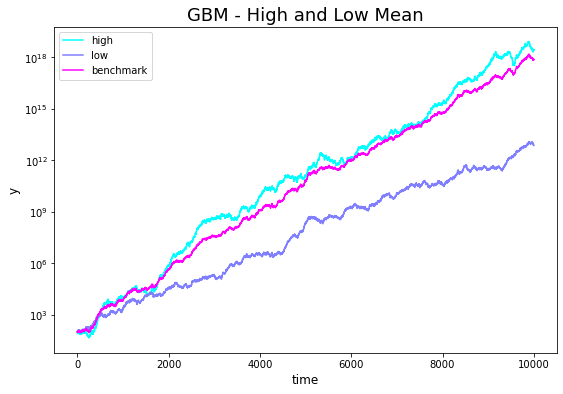

In [14]:
ax = generate_ax('GBM - High and Low Mean', 'time', 'y')
gbm.plot(logy=True, ax=ax, cmap='cool')

In [15]:
signal_noise_high = 0.002
signal_noise_low = 0.002
signal_high = pd.Series(np.random.normal(high_mean, signal_noise_high, T))
signal_low = pd.Series(np.random.normal(low_mean, signal_noise_low, T))
perfect_signal_high = pd.Series(np.random.normal(high_mean, 0, T))
perfect_signal_low = pd.Series(np.random.normal(low_mean, 0, T))

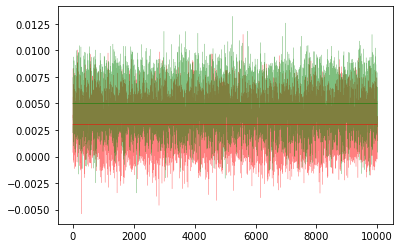

In [16]:
signal_low.plot(color='red', linewidth=0.3, alpha=0.5)
signal_high.plot(color='green', linewidth=0.3, alpha=0.5)
perfect_signal_low.plot(color='red', linewidth=0.5)
perfect_signal_high.plot(color='green', linewidth=0.5)
plt.show()

In [17]:
strat_w_l = []
perfect_strat_w_l = []
for row in pd.concat([signal_high, signal_low, perfect_signal_high, perfect_signal_low], axis=1).iterrows():
    strat_w_l.append(time_average_optimal_w(row[1].values[0], row[1].values[1], sigma_1, sigma_2, 0))
    perfect_strat_w_l.append(time_average_optimal_w(row[1].values[2], row[1].values[3], sigma_1, sigma_2, 0))
    
strat_w = pd.Series(strat_w_l)
perfect_strat_w = pd.Series(perfect_strat_w_l)

In [18]:
strat_ret = gbm_ret.loc[:, 'high'] * strat_w + gbm_ret.loc[:, 'low'] * (1-strat_w)  
strat = rebase_at_x((strat_ret.fillna(0) + 1).cumprod())

perfect_strat_ret = gbm_ret.loc[:, 'high'] * perfect_strat_w + gbm_ret.loc[:, 'low'] * (1-perfect_strat_w)  
perfect_strat = rebase_at_x((perfect_strat_ret.fillna(0) + 1).cumprod())

gbm['strat'] = strat
gbm['perf_strat'] = perfect_strat

<AxesSubplot:title={'center':'GBM - High and Low Mean'}, xlabel='time', ylabel='y'>

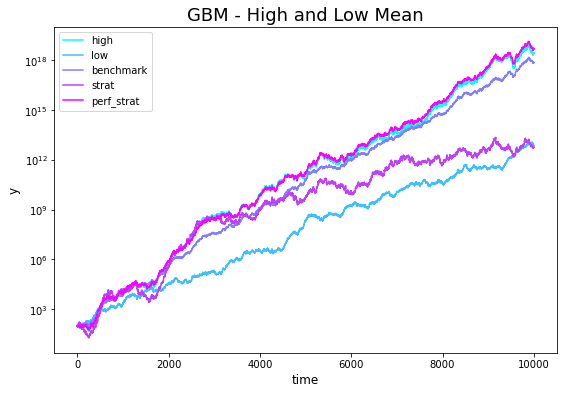

In [19]:
ax = generate_ax('GBM - High and Low Mean', 'time', 'y')
gbm.plot(logy=True, ax=ax, cmap='cool')

## <span style='font-family:Inter'> Markov Chain Simulation
   

<AxesSubplot:>

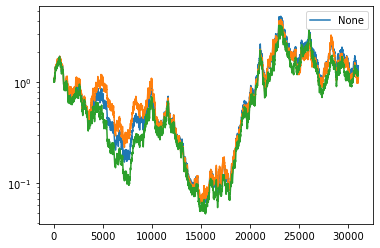

In [7]:
n = 1000
ret = 0.005
P = np.array([[0.8, 0.2],
              [0.2, 0.8]])

i = 0;
path1 = [0]
I = np.arange(len(P))
for _ in range(n):    
    i = np.random.choice(I, p = P[i])        
    path.append(i);

i = 0;
path2 = [0]
I = np.arange(len(P))
for _ in range(n):    
    i = np.random.choice(I, p = P[i])        
    path2.append(i);

path_raw1 =pd.Series(path).map({0: ret, 1: -ret})
path_raw2 =pd.Series(path).map({0: ret, 1: -ret})
path_1 = path_raw2 + np.random.normal(0, 0.005, len(path_raw1))
path_2 = path_raw2 + np.random.normal(0, 0.005, len(path_raw2))
strat = ((path_1 + path_2)/2 + 1).cumprod().plot(legend='strat')  
(path_1 + 1).cumprod().plot()
(path_2 + 1).cumprod().plot(logy=True)

## <span style='font-family:Inter'> Example

<AxesSubplot:xlabel='A', ylabel='B'>

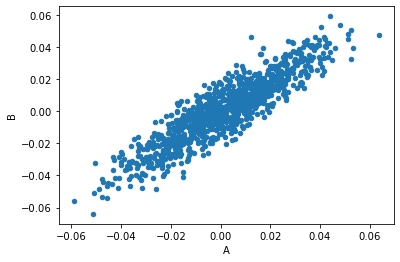

In [161]:
mean_1, mean_2 = 0.001, 0.001
sigma_1, sigma_2 = 0.02, 0.02
n = 1000
corr = 0.9
cov = corr * sigma_1 * sigma_2
equity_ret = pd.DataFrame(np.random.multivariate_normal([0.001, 0.001], [[sigma_1**2, cov], [cov, sigma_2**2]], size=n))
equity_ret.columns = ['A', 'B']
equity_ret.plot.scatter('A', 'B')

<AxesSubplot:>

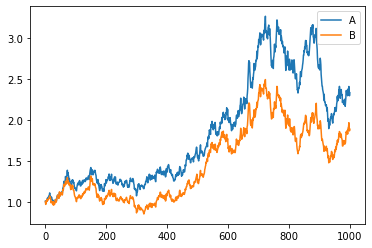

In [162]:
(equity_ret + 1).cumprod().plot()

In [169]:
signal = equity_ret

In [193]:
import scipy.stats as sp

noise = np.random.normal(0, 0.01, n)
signal_noised = signal.add(pd.Series(noise), axis=0)
signal_noised

sp.spearmanr(equity_ret.rank().loc[:, 'A'], signal_noised.rank().loc[:, 'A'])

SpearmanrResult(correlation=0.8966004446004445, pvalue=0.0)

In [194]:
signal_noised = (signal_noised - signal_noised.mean()) /  signal_noised.std()
conv = np.tanh(signal_noised) + 1
w = conv.div(conv.sum(axis=1), axis=0)

<AxesSubplot:>

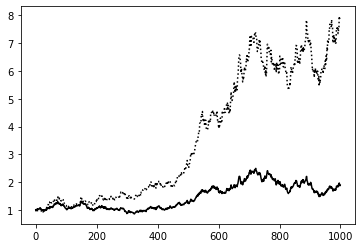

In [186]:
asset = 'B'

((conv.loc[:, asset] * equity_ret.loc[:, asset]) + 1).cumprod().plot(color='black', linestyle='dotted')
((equity_ret.loc[:, asset]) + 1).cumprod().plot(color='black')

<AxesSubplot:>

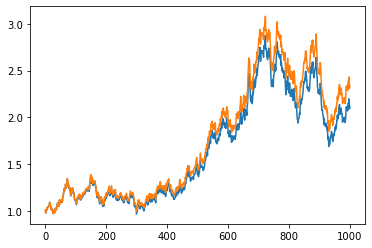

In [187]:
(equity_ret.mean(axis=1) + 1).cumprod().plot()
(equity_ret.mul(w).sum(axis=1) +1).cumprod().plot()